# Brain Tumor Detection EDA

In [1]:
# Libraries
# !pip install mat73

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import mat73

from PIL import Image
import cv2
import helper
from sklearn.model_selection import train_test_split

### Parameters

In [2]:
resize = 0.2

### Image example

In [3]:
### Choose any number from 1 to 3046
file_number = 955
file = f'../data/brain-tumor-data-public/{file_number}.mat'

#https://stackoverflow.com/questions/17316880/reading-v-7-3-mat-file-in-python
data_dict = mat73.loadmat(file)

### Patient Id
print("Patient ID:" + str(int(data_dict['cjdata']['PID'])) + "\n")

### Label
# 1 for meningioma, 2 for glioma, 3 for pituitary tumor
print("Tumor type:" + str(int(data_dict['cjdata']['label'])))

Patient ID:108931

Tumor type:3


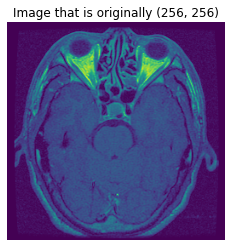

In [4]:
### Image preprocessing
imx = data_dict['cjdata']['image']
imx = imx/imx.max() #Values are not normalized
imx = imx*255 #Scale from 0 to 255
imx = np.round(imx) 
imx = imx.astype(np.uint8) #np datatype for images

im = Image.fromarray(imx)

### Image
fig, ax = plt.subplots()
ax.imshow(im)
plt.axis('off');
plt.title('Image that is originally ' + str(imx.shape));

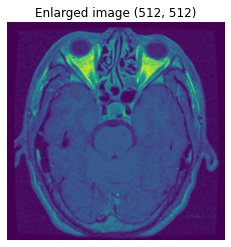

In [5]:
### We can convert it to 512 x 512 as the other images 
imx = data_dict['cjdata']['image']
imx = imx/imx.max() #Values are not normalized
imx = imx*255 #Scale from 0 to 255
imx = np.round(imx) 
imx = imx.astype(np.uint8) #np datatype for images
imx = cv2.resize(imx, (0,0), fx=2,fy=2)

im = Image.fromarray(imx)

### Image
fig, ax = plt.subplots()
ax.imshow(im)
plt.axis('off')
plt.title('Enlarged image ' + str(imx.shape));

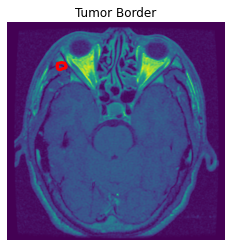

In [6]:
### Tumor Border (pixels in which there is a tumor)
tumor_border = data_dict['cjdata']['tumorBorder']
tumor_border_x = tumor_border[0::2]
tumor_border_y = tumor_border[1::2]

### Border
fig, ax = plt.subplots()
ax.imshow(im)
ax.plot(tumor_border_x, tumor_border_y, color='red', lw=3)
plt.axis('off');
plt.title('Tumor Border');

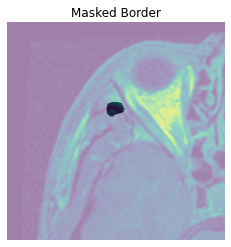

In [7]:
### Tumor Mask (pixels in which there is a tumor)
mask = data_dict['cjdata']['tumorMask']
mask = mask.astype(np.uint8) #np datatype for images
# mask = 1-mask

mask_im = Image.fromarray(mask)

### Mask
fig, ax = plt.subplots()
ax.imshow(im)
ax.imshow(mask_im, cmap='Greys', alpha = 0.5)
plt.axis('off');
plt.title('Masked Border');

### cvind

According to the README file, "the 5-fold cross-validation indices are also provided", and this appear to be stored in this *cvind* file. However, we do not understand what is the author exactly referring to when talking about cross-validation in this context.

In [8]:
file = '../data/cvind.mat'
#https://stackoverflow.com/questions/17316880/reading-v-7-3-mat-file-in-python
data_dict = mat73.loadmat(file)

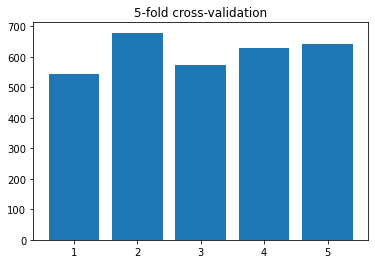

In [9]:
#https://stackoverflow.com/questions/42247104/how-to-create-graphs-of-relative-frequency-from-pandas-dataframe
indx = [2, 5, 4, 3, 1]
cval_df = pd.DataFrame(data_dict['cvind'].astype(int))
plt.bar(indx, cval_df.iloc[:][0].value_counts());
plt.title('5-fold cross-validation');

### Multiple brain images

In [10]:
### Choose 16 numbers from 1 to 3046
random.seed(123456)
file_numbers = random.sample(range(1,3046), 16, )
files = [f'../data/brain-tumor-data-public/{file_number}.mat' for file_number in file_numbers]

data_dicts = [mat73.loadmat(file) for file in files]

In [11]:
### Label
# 1 for meningioma, 2 for glioma, 3 for pituitary tumor
labels = [int(data_dict['cjdata']['label']) for data_dict in data_dicts]
labels_tumor = [helper.translate_label(label) for label in labels]
print(pd.DataFrame(list(zip(labels, labels_tumor)), columns =['label', 'tumor_type']).to_string(index = False))

 label tumor_type
     3 pituituary
     1 meningioma
     2     glioma
     1 meningioma
     2     glioma
     1 meningioma
     2     glioma
     3 pituituary
     1 meningioma
     1 meningioma
     3 pituituary
     2     glioma
     2     glioma
     2     glioma
     1 meningioma
     2     glioma


In [12]:
### Image preprocessing
imxs = [data_dict['cjdata']['image'] for data_dict in data_dicts]
imxs = [helper.imx_preproc(imx) for imx in imxs]

ims = [Image.fromarray(imx) for imx in imxs]

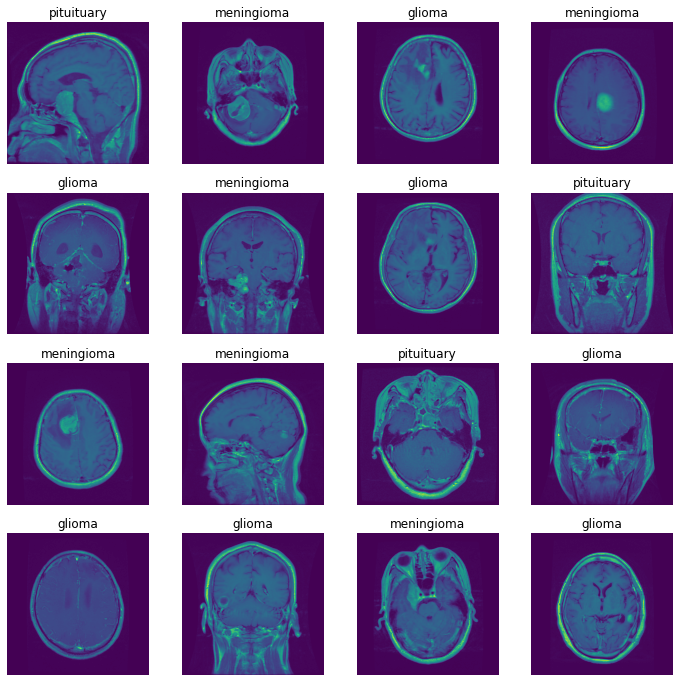

In [13]:
### Image
fig, axs = plt.subplots(4, 4, figsize = (12,12))

k = 0
for i in range(4):
    for j in range(4):
        plt.sca(axs[i,j]); ax = plt.gca()
        ax.imshow(ims[k])
        ax.set_axis_off() 
        ax.set_title(labels_tumor[k])
        k+=1

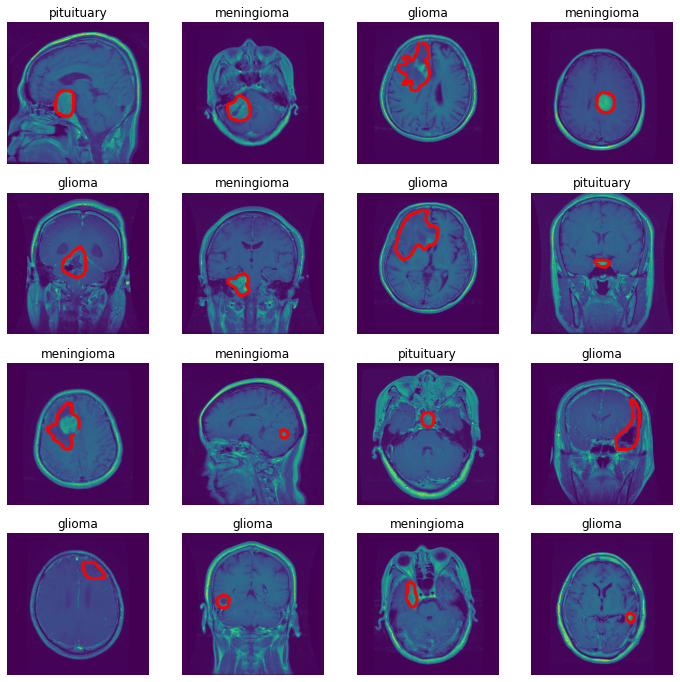

In [14]:
### Tumor Border (pixels in which there is a tumor)
tumor_borders = [data_dict['cjdata']['tumorBorder'] for data_dict in data_dicts]

### Border
fig, axs = plt.subplots(4, 4, figsize = (12,12))

k = 0
for i in range(4):
    for j in range(4):
        plt.sca(axs[i,j]); ax = plt.gca()
        ax.imshow(ims[k])
        
        tumor_border = tumor_borders[k]
        tumor_border_x, tumor_border_y = tumor_border[0::2], tumor_border[1::2]
        ax.plot(tumor_border_x, tumor_border_y, color='red', lw=3)
        ax.set_title(labels_tumor[k])
        
        ax.set_axis_off()        
        k+=1

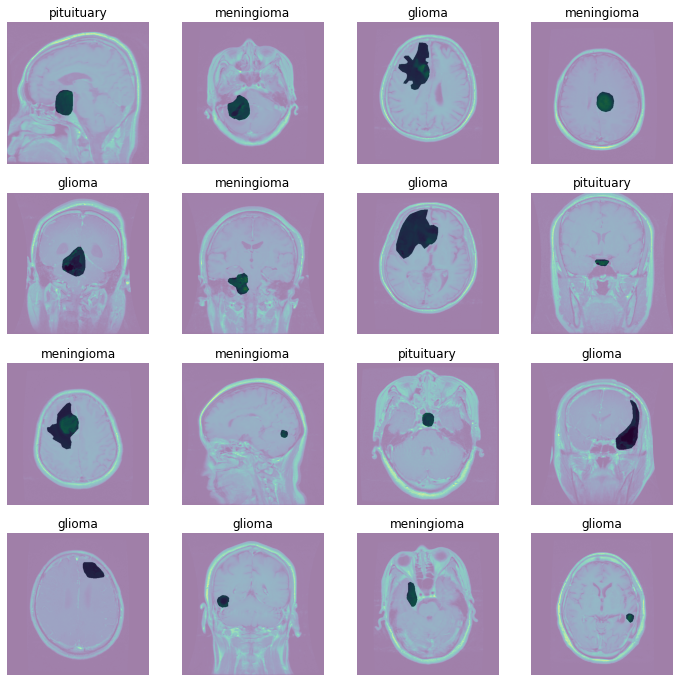

In [15]:
### Tumor Mask (pixels in which there is a tumor)
masks = [data_dict['cjdata']['tumorMask'] for data_dict in data_dicts]

### Mask
fig, axs = plt.subplots(4, 4, figsize = (12,12))

k = 0
for i in range(4):
    for j in range(4):
        plt.sca(axs[i,j]); ax = plt.gca()
        ax.imshow(ims[k])
        
        mask = masks[k]
        mask = mask.astype(np.uint8) #np datatype for images
        mask_im = Image.fromarray(mask)
        ax.imshow(mask_im, cmap='Greys', alpha = 0.5)
        ax.set_title(labels_tumor[k])
        
        ax.set_axis_off()        
        k+=1

### Group by Patient ID

In [16]:
### Load each file independently (to avoid memory overflows) and retriev PID
patient_ids_dict = dict()
label_ids_dict = dict()
shape_x_dict = dict()
shape_y_dict = dict()
image_dict = dict()

for file_number in range(1,3047):
    file = f'../data/brain-tumor-data-public/{file_number}.mat'
    data_dict = mat73.loadmat(file)
    patient_ids_dict[file_number] = data_dict['cjdata']['PID']
    label_ids_dict[file_number] = int(data_dict['cjdata']['label'])
    shape_x_dict[file_number] = data_dict['cjdata']['image'].shape[0]
    shape_y_dict[file_number] = data_dict['cjdata']['image'].shape[1]
    image_dict[file_number] = data_dict['cjdata']['image']

In [17]:
patient_ids = pd.Series(patient_ids_dict)
label_ids = pd.Series(label_ids_dict)
shape_x = pd.Series(shape_x_dict)
shape_y = pd.Series(shape_y_dict)
image = pd.Series(image_dict)

patients = pd.DataFrame({'pid':patient_ids, 'label':label_ids,
                         'x':shape_x, 'y':shape_y, 'image':image}, index=range(1, 3047))

In [18]:
patients

pid  label    x    y  \
1        100360      1  512  512   
2        100360      1  512  512   
3        100360      1  512  512   
4        100360      1  512  512   
5        100360      1  512  512   
...         ...    ...  ...  ...   
3042  MR040240C      2  512  512   
3043  MR040240C      2  512  512   
3044  MR040240C      2  512  512   
3045  MR040240C      2  512  512   
3046  MR040240C      2  512  512   

                                                  image  
1     [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
2     [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
3     [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
4     [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
5     [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
...                                                 ...  
3042  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
3043  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
3044  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
3045  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
3046  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  

[3046 rows x 5 columns]

We first apply the `imx_preproc` function to the *image* column in order to normalize it as we want it, and convert it to float:

In [19]:
patients['image'] = patients['image'].apply(lambda x : helper.imx_preproc(x, zero_up_to_one=True, resize=resize))
patients['image'] = patients['image'].apply(lambda x : x.astype('float32'))

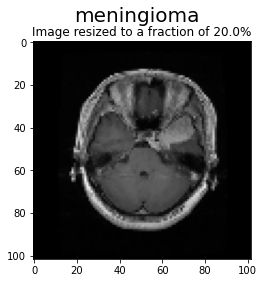

In [20]:
### Example (note we multiply by 255 since we have it on a 0 to 1 scale)
fig, ax = plt.subplots()
im = Image.fromarray(patients['image'].iloc[0]*255)
ax.imshow(im)
plt.axis()
plt.title('Image resized to a fraction of ' + str(round(resize*100, 0 )) + '%');
plt.suptitle(str(helper.translate_label(patients['label'].iloc[0])),fontsize=20, y=1);

The following code shows each patient has a unique label (else, we would have a printed *pid*, as can be seen in the testing cell following this one):

In [21]:
for pid in patients['pid'].unique():    
    if patients[patients['pid'] == pid]['label'].nunique() > 1:
        print(pid)

In [22]:
aux = pd.concat([patients, pd.DataFrame({'pid':['MR040240C'], 'label':[3]}, index = [9999])])

for pid in aux['pid'].unique():    
    if aux[aux['pid'] == pid]['label'].nunique() > 1:
        print(pid)

MR040240C


The MRI count distribution is quite unequal:

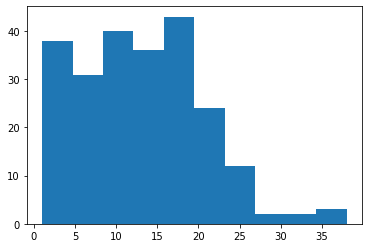

In [23]:
### Distribution of MRI count by PID
fig, ax = plt.subplots()
ax.hist(patients.groupby('pid').count()['label']);

Nonetheless, we would like the model to be able to identify the cancer type with any of the MRI angles, so we will not bother classifying them.

### Analysis fixing a patient

In [24]:
### Choose a PID
pid = '100360'
file_numbers = patients[patients['pid'] == pid].index.tolist()
files = [f'../data/brain-tumor-data-public/{file_number}.mat' for file_number in file_numbers]

data_dicts = [mat73.loadmat(file) for file in files]
n = len(data_dicts)

In [25]:
### Label
# 1 for meningioma, 2 for glioma, 3 for pituitary tumor
labels = [int(data_dict['cjdata']['label']) for data_dict in data_dicts]
labels

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [26]:
### Image preprocessing
imxs = [data_dict['cjdata']['image'] for data_dict in data_dicts]
imxs = [helper.imx_preproc(imx) for imx in imxs]

ims = [Image.fromarray(imx) for imx in imxs]

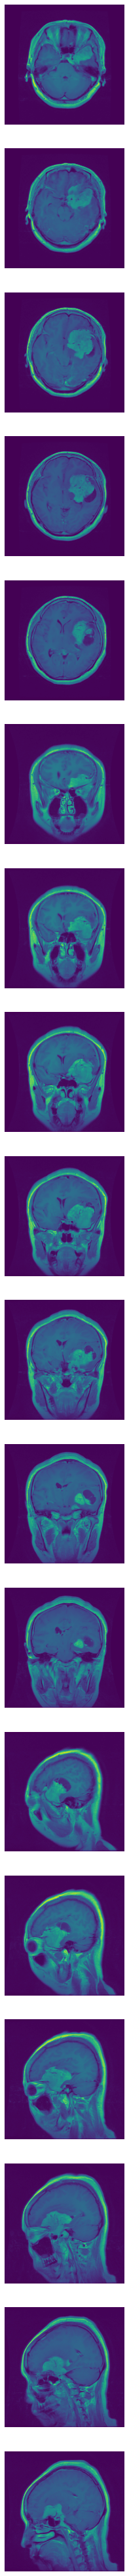

In [27]:
### Image
fig, axs = plt.subplots(n, 1, figsize = (12,n*4))

k = 0
for i in range(n):    
    plt.sca(axs[k]); ax = plt.gca()
    ax.imshow(ims[k])
    ax.set_axis_off()
    k+=1

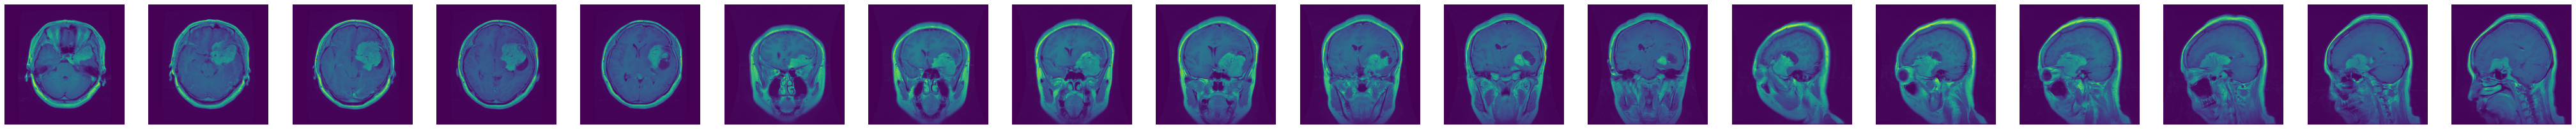

In [28]:
### Image
fig, axs = plt.subplots(1,n, figsize = (n*4, 6))

k = 0
for i in range(n):    
    plt.sca(axs[k]); ax = plt.gca()
    ax.imshow(ims[k])
    ax.set_axis_off()        
    k+=1

In [29]:
### Tumor Border (pixels in which there is a tumor)
tumor_borders = [data_dict['cjdata']['tumorBorder'] for data_dict in data_dicts]

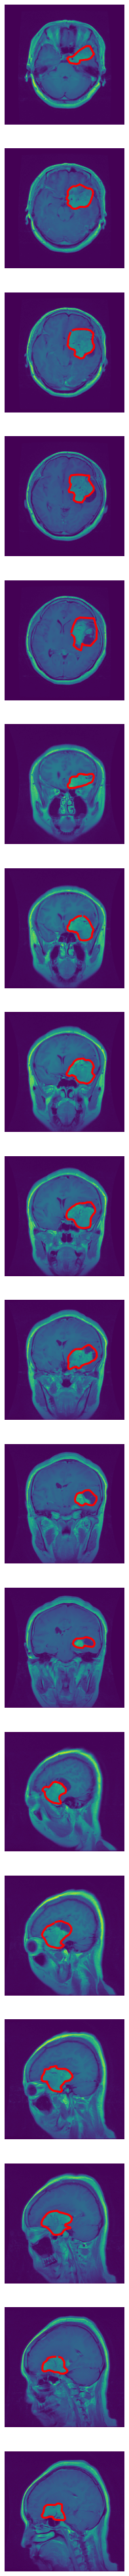

In [30]:
### Border
fig, axs = plt.subplots(n, 1, figsize = (12,n*4))

k = 0
for i in range(n):    
    plt.sca(axs[k]); ax = plt.gca()
    ax.imshow(ims[k])

    tumor_border = tumor_borders[k]
    tumor_border_x, tumor_border_y = tumor_border[0::2], tumor_border[1::2]
    ax.plot(tumor_border_x, tumor_border_y, color='red', lw=3)

    ax.set_axis_off()        
    k+=1

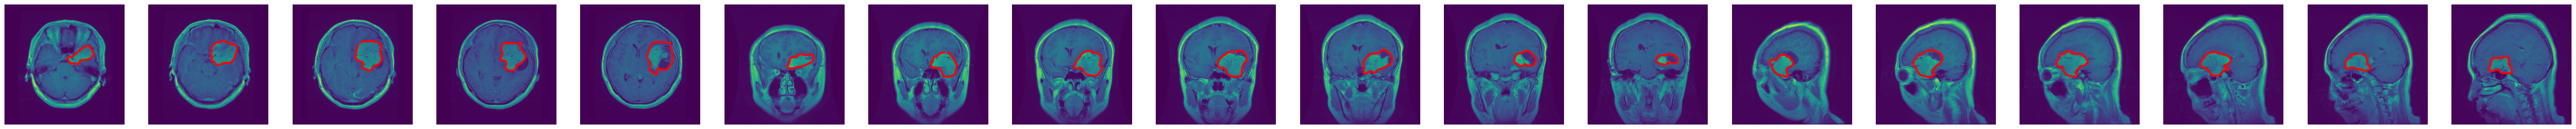

In [31]:
### Border
fig, axs = plt.subplots(1, n, figsize = (n*4, 6))

k = 0
for i in range(n):    
    plt.sca(axs[k]); ax = plt.gca()
    ax.imshow(ims[k])

    tumor_border = tumor_borders[k]
    tumor_border_x, tumor_border_y = tumor_border[0::2], tumor_border[1::2]
    ax.plot(tumor_border_x, tumor_border_y, color='red', lw=3)

    ax.set_axis_off()        
    k+=1

In [32]:
### Tumor Mask (pixels in which there is a tumor)
masks = [data_dict['cjdata']['tumorMask'] for data_dict in data_dicts]

In [33]:
### Tumor Mask (pixels in which there is a tumor)
mask = data_dict['cjdata']['tumorMask']
mask = mask.astype(np.uint8) #np datatype for images
# mask = 1-mask

mask_im = Image.fromarray(mask)

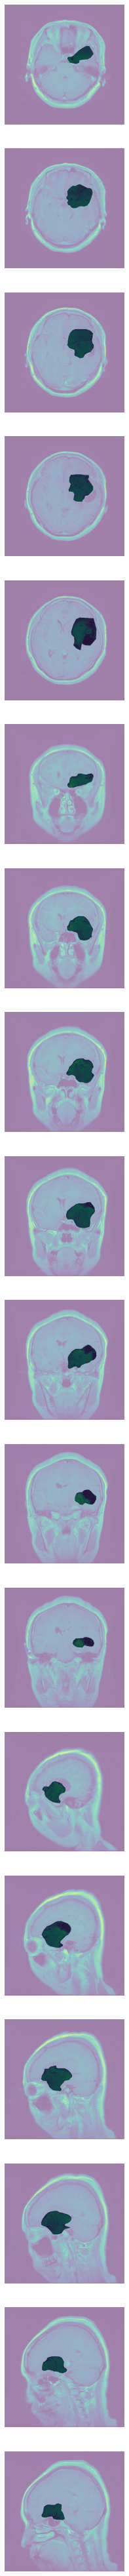

In [34]:
### Mask
fig, axs = plt.subplots(n, 1, figsize = (12,n*4))

k = 0
for i in range(n):
    plt.sca(axs[k]); ax = plt.gca()
    ax.imshow(ims[k])

    mask = masks[k]
    mask = mask.astype(np.uint8) #np datatype for images
    mask_im = Image.fromarray(mask)
    ax.imshow(mask_im, cmap='Greys', alpha = 0.5)

    ax.set_axis_off()        
    k+=1

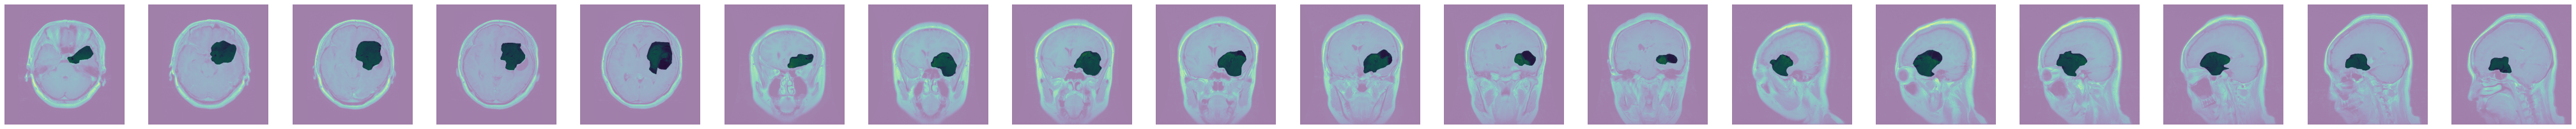

In [35]:
### Mask
fig, axs = plt.subplots(1, n, figsize = (n*4, 6))

k = 0
for i in range(n):
    plt.sca(axs[k]); ax = plt.gca()
    ax.imshow(ims[k])

    mask = masks[k]
    mask = mask.astype(np.uint8) #np datatype for images
    mask_im = Image.fromarray(mask)
    ax.imshow(mask_im, cmap='Greys', alpha = 0.5)

    ax.set_axis_off()        
    k+=1

### Train, Validation and Test Sets

In [36]:
random.seed(1234)

val_size = 0.2
test_size = 0.2
# Training set has 2436 images test set has 610 images 
train_set, test_set = train_test_split(patients, stratify=patients['label'], test_size=test_size)
# Training set has 1948 images, validation set has 488 images
train_set, val_set = train_test_split(train_set, stratify=train_set['label'], test_size=val_size)

n_total_train = train_set.shape[0]

train_set_x = np.stack(train_set['image'].values)
train_set_y = np.array(train_set['label'])

val_set_x = np.stack(val_set['image'].values)
val_set_y = np.array(val_set['label'])

A possible alternative, though it did not seem to help that much. https://www.tensorflow.org/tutorials/load_data/numpy

```python
train_dataset = tf.data.Dataset.from_tensor_slices((train_set_x, train_set_y))
test_dataset = tf.data.Dataset.from_tensor_slices((val_set_x, val_set_y))

BATCH_SIZE = 64
SHUFFLE_BUFFER_SIZE = 20

train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)
```



In [37]:
print(train_set_x.shape)
print(val_set_x.shape)
print(np.stack(test_set['image'].values).shape)

(1948, 102, 102)
(488, 102, 102)
(610, 102, 102)


In [38]:
train_counts = train_set['label'].value_counts().sort_index()
validation_counts = val_set['label'].value_counts().sort_index()
test_counts = test_set['label'].value_counts().sort_index()

aux = train_counts.reset_index().applymap(helper.translate_label).set_index('index').rename(columns = {'label':'train counts'})
aux['val counts'] = validation_counts.reset_index().applymap(helper.translate_label).set_index('index')
aux['test counts'] = test_counts.reset_index().applymap(helper.translate_label).set_index('index')
aux.index.name = f'Train {int(100*(1-test_size))}% - Test {int(100*(test_size))}%'
aux

train counts  val counts  test counts
Train 80% - Test 20%                                       
meningioma                     451         113          142
glioma                         902         226          282
pituituary                     595         149          186

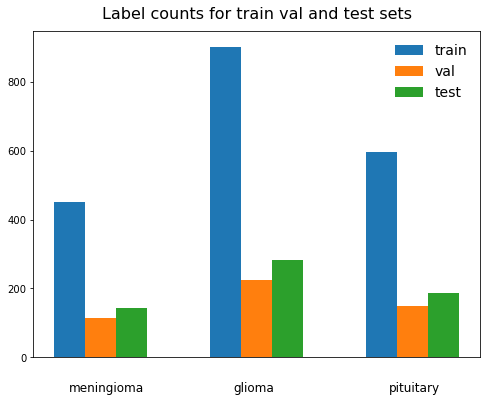

In [39]:
fig, ax = plt.subplots(figsize = (8, 6))

ax.bar(train_counts.index-0.2, train_counts.values, label = 'train', width = 0.2)
ax.bar(train_counts.index, validation_counts.values, label = 'val', width = 0.2)
ax.bar(test_counts.index+0.2, test_counts.values, label = 'test', width = 0.2)
ax.set_xticks([])
ax.text(0.8, -100, 'meningioma', size = 12)
ax.text(1.85, -100, 'glioma', size = 12)
ax.text(2.85, -100, 'pituitary', size = 12)

ax.set_title('Label counts for train val and test sets', fontsize = 16, y = 1.02)
plt.legend(frameon=False, fontsize = 14);

# References: 

- [Reading mat files in Python.](https://stackoverflow.com/questions/17316880/reading-v-7-3-mat-file-in-python)

- [Plotting barplots.](https://stackoverflow.com/questions/42247104/how-to-create-graphs-of-relative-frequency-from-pandas-dataframe)